# CERN electron collision [data](https://www.kaggle.com/fedesoriano/cern-electron-collision-data)
## Particle collision events with two electrons

### Context
This dataset contains 100k dielectron events in the invariant mass range 2-110 GeV for use in outreach and education. These data were selected for use in education and outreach and contain a subset of the total event information. The selection criteria may be different from that used in CMS physics results.

### Content
*  Run: The run number of the event. 
*  Event: The event number. 
*  E1, E2: The total energy of the electron (GeV) for electrons 1 and 2. 
*  px1,py1,pz1,px2,py2,pz2: The components of the momemtum of the electron 1 and 2 (GeV). 
*  pt1, pt2: The transverse momentum of the electron 1 and 2 (GeV). 
*  eta1, eta2: The pseudorapidity of the electron 1 and 2. 
*  phi1, phi2: The phi angle of the electron 1 and 2 (rad). 
*  Q1, Q2: The charge of the electron 1 and 2. 
*  M: The invariant mass of two electrons (GeV).



In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style(style='darkgrid')

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/dielectron.csv'
df = pd.read_csv(path)
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


### Exploratory Data Analysis

Check for missing values.

In [ ]:
df.isnull().sum()

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64

Since only 0.085% of the data is missing, let us drop those rows.

In [ ]:
df.dropna(inplace=True)

Features `[Run, Event]` are the run number and event numbers which does not contribute to the target variable and can be dropped.

In [ ]:
df.drop(columns=['Run', 'Event'], inplace=True)

A correlation matrix helps in understanding which features directly affect the target variable.

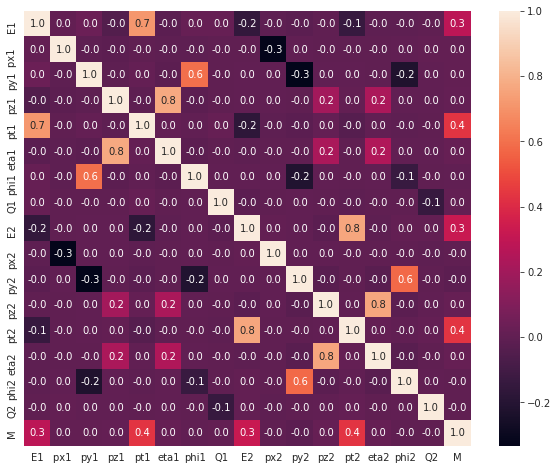

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='0.1f');

From the heatmap, it can be observed that target variable, `M` is dependent directly on `[E1, pt1, E2, pt2]`. \\
From the correlation matrix, it can be observed that some features correlated to each other. Let us visualize some of the correlation.

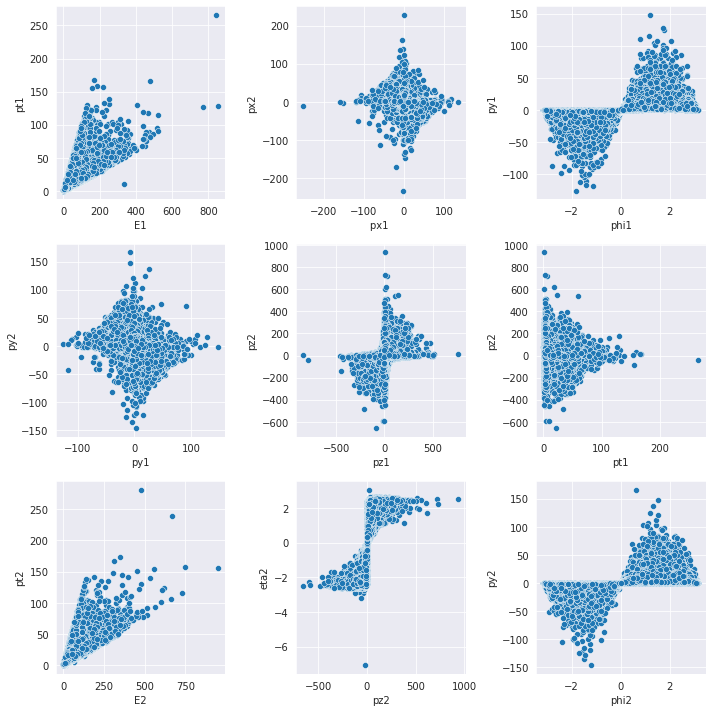

In [ ]:
plt.figure(figsize=(10,10), tight_layout=True)
r,c = 3, 3
plt.subplot(r,c,1)
sns.scatterplot(x=df['E1'], y=df['pt1']);
plt.subplot(r,c,2)
sns.scatterplot(x=df['px1 '], y=df['px2']);
plt.subplot(r,c,3)
sns.scatterplot(x=df['phi1'], y=df['py1']);
plt.subplot(r,c,4)
sns.scatterplot(x=df['py1'], y=df['py2']);
plt.subplot(r,c,5)
sns.scatterplot(x=df['pz1'], y=df['pz2']);
plt.subplot(r,c,6)
sns.scatterplot(x=df['pt1'], y=df['pz2']);
plt.subplot(r,c,7)
sns.scatterplot(x=df['E2'], y=df['pt2']);
plt.subplot(r,c,8)
sns.scatterplot(x=df['pz2'], y=df['eta2']);
plt.subplot(r,c,9)
sns.scatterplot(x=df['phi2'], y=df['py2']);


## Linear Regression

Since the target is floating value, linear regression can be applied on the dataset.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
X = df.drop(columns='M')
y = df[['M']].squeeze()

Before applying linear regression, let us check the data distribution

In [ ]:
X.describe()

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
count,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000,99915.000000
mean,36.460107,0.135858,0.183211,-1.509100,14.418195,-0.064143,0.022002,-0.005495,44.028549,-0.003442,0.125963,-1.591798,13.804597,-0.072885,0.021772,-0.004234
std,41.225336,13.409322,13.474668,51.625332,12.391213,1.462626,1.799506,0.999990,46.761747,13.130364,13.171806,61.455194,12.463948,1.738660,1.816991,0.999996
min,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.000000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000
25%,8.472775,-5.237190,-5.281100,-15.898650,3.773670,-1.284650,-1.526580,-1.000000,11.065550,-4.793870,-4.604685,-22.062650,3.737825,-1.892965,-1.556060,-1.000000
50%,21.740200,0.141661,0.100544,-0.313360,12.972900,-0.061352,0.035015,-1.000000,25.291400,-0.035653,0.084512,-0.692463,11.690800,-0.136708,0.027453,-1.000000
75%,50.059250,5.718920,5.652355,13.234400,20.026050,1.145405,1.562680,1.000000,66.983350,4.818905,5.063075,19.041800,19.601700,1.769300,1.597040,1.000000
max,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.000000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000


Scaling the data helps in increasing the performance of the regression model. Let us split the data into train and test set.

In [ ]:
xTr, xTs, yTr, yTs = train_test_split(X, y, test_size = 0.25)

Applying minmax scaling

In [ ]:
scaler = MinMaxScaler()
xTr = scaler.fit_transform(xTr)
xTs = scaler.transform(xTs)

Fit a linear model and check the MSE and R2 for test data

In [ ]:
reg = LinearRegression()
reg.fit(xTr, yTr)
yPred = reg.predict(xTs)
print(f'MSE: {mean_squared_error(yTs, yPred):0.2f}, R2: {r2_score(yTs, yPred):0.4f}')

MSE: 385.37, R2: 0.3909


A graph of actual vs predicted gives how well the model fits the data

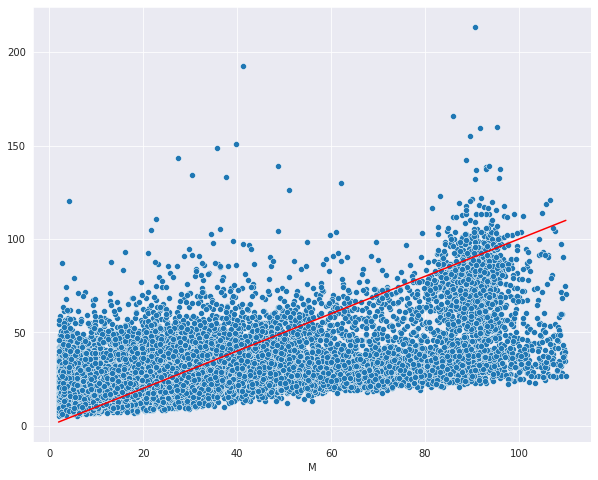

In [ ]:
plt.figure(figsize=(10,8))
xyMin, xyMax = yTs.min(), yTs.max()
sns.lineplot(x=[xyMin, xyMax], y=[xyMin, xyMax], color='red')
sns.scatterplot(x=yTs, y=yPred);

The given dataset is not linear on the target variable, since MSE is a large number, and R2 is small.

## Random forest

Since the data is not linear, to design a more complex model, random forest of decision trees can be applied.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
reg = RandomForestRegressor()
reg.fit(xTr, yTr)
yPred = reg.predict(xTs)
print(f'MSE: {mean_squared_error(yTs, yPred):0.2f}, R2: {r2_score(yTs, yPred):0.4f}')

MSE: 33.62, R2: 0.9469


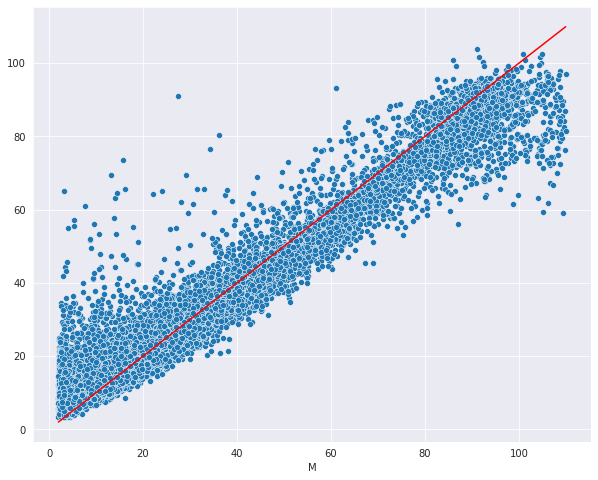

In [ ]:
plt.figure(figsize=(10,8))
xyMin, xyMax = yTs.min(), yTs.max()
sns.lineplot(x=[xyMin, xyMax], y=[xyMin, xyMax], color='red')
sns.scatterplot(x=yTs, y=yPred);

Using random forest, the model performs better on test data with relatively small MSE and higher R2. Since the model performed well, let us understand which features are important in predicting the target variable and their ranking.

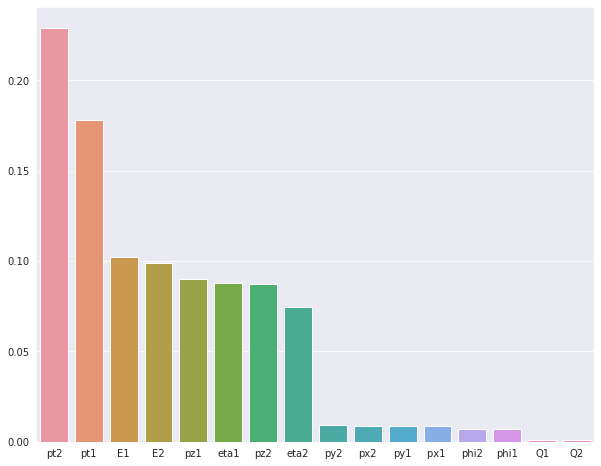

In [ ]:
plt.figure(figsize=(10,8))
feature_importance = reg.feature_importances_
idx = np.argsort(-feature_importance, )
sns.barplot(x=df.columns[idx] ,y=feature_importance[idx]);

`[pt2, pt1, E2, E1, pz2, eta1, eta2, px2, py1, py2, px1, Event, phi2, phi1, Run, Q2, Q1]` is the order of importance of the features in predicting the target `M`.

## Fully Connected Neural Network

Eventhough with random forest MSE reduced sigificantly, and model predicts with relatively high accuracy, neural network can be built for the model since 100k data is available with only 16 fetures.

In [ ]:
import tensorflow as tf

Building a FC NN model with 2 hidden layers. One with 32 units another with 8 units. The model has 817 trainable parameters.

In [ ]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
            tf.keras.layers.Dense(units=32, input_shape=(xTr.shape[1],), activation='relu', name='FC1'), 
            tf.keras.layers.Dense(units=8, activation='relu', name='FC2'), 
            tf.keras.layers.Dense(units=1, name='Output')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), loss=tf.keras.losses.mean_squared_error)
init = 0
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FC1 (Dense)                  (None, 32)                544       
_________________________________________________________________
FC2 (Dense)                  (None, 8)                 264       
_________________________________________________________________
Output (Dense)               (None, 1)                 9         
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


Writing a custom callback function to log MSE of validation data every 10 epochs.

In [ ]:
class LogMetrics(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 9:
            val_loss = mean_squared_error(yTs, self.model.predict(xTs))
            print(f'Epoch: {epoch+1}/{self.params["epochs"]} - val_loss: {val_loss:0.4f} ')

Passing early stopping callback to avoid overfitting.

In [ ]:
xtr, xval, ytr, yval = train_test_split(xTr, yTr, test_size=0.1)
epochs = 500
hist = model.fit(xtr, ytr, validation_data=(xval, yval), epochs=epochs, verbose=0, batch_size=128, 
                 callbacks=[LogMetrics(), tf.keras.callbacks.EarlyStopping(min_delta=0.1, patience=5)])

Epoch: 10/500 - val_loss: 49.4221 
Epoch: 20/500 - val_loss: 32.0735 
Epoch: 30/500 - val_loss: 30.1572 
Epoch: 40/500 - val_loss: 28.4382 
Epoch: 50/500 - val_loss: 26.3014 
Epoch: 60/500 - val_loss: 15.7066 
Epoch: 70/500 - val_loss: 13.1030 
Epoch: 80/500 - val_loss: 12.0487 
Epoch: 90/500 - val_loss: 11.4001 


A graph of traing loss vs valiation loss gives insight on model overfitting/ underfitting

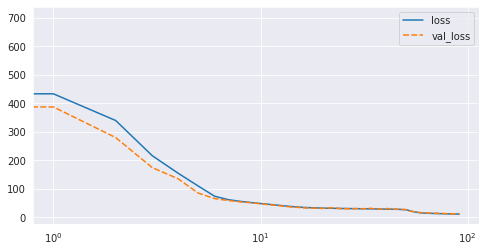

In [ ]:
plt.figure(figsize=(8,4))
splot = sns.lineplot(data=hist.history);
splot.set(xscale="log");

In [ ]:
yPred = model.predict(xTs)
print(f'MSE: {mean_squared_error(yTs, yPred):0.2f}, R2: {r2_score(yTs, yPred):0.4f}')

MSE: 12.57, R2: 0.9801


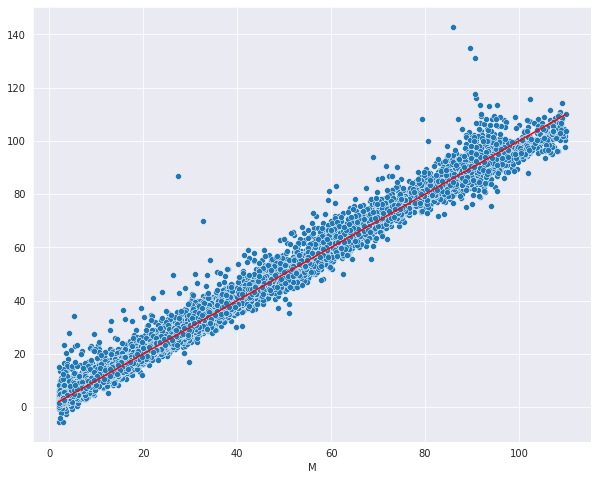

In [ ]:
plt.figure(figsize=(10,8))
sns.set_style(style='darkgrid')
xyMin, xyMax = yTs.min(), yTs.max()
sns.lineplot(x=[xyMin, xyMax], y=[xyMin, xyMax], color='red')
sns.scatterplot(x=yTs, y=yPred.squeeze());

The NN model gave the best result of all models.